In [37]:
import sys
import warnings
from tqdm import tqdm

import csv
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
names = ['id', 'date', 'tags', 'likes']
dtypes = {'id': 'int', 'date': 'str', 'col3': 'str', 'likes': 'int'}
df = pd.read_csv('data.csv', header=None, names=names, dtype=dtypes, parse_dates=['date'])

In [27]:
df.head()

,id,date,tags,likes
0,2,2009-09-10,women sellers,0
1,4,2009-09-15,advert,0
2,5,2009-09-15,insurers mail,0
3,6,2009-10-06,mail,828
4,8,2009-10-06,byphone secretaries,1127


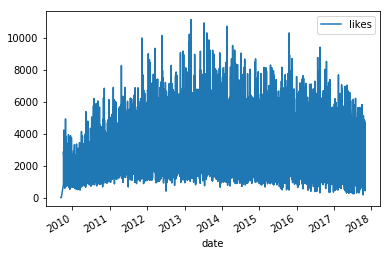

In [28]:
df.plot(x='date', y='likes')

## Smoothing likes

In [44]:
def plotMovingAverage(series, n):

    """
    series - dataframe with timeseries
    n - rolling window size 

    """

    rolling_mean = series.rolling(window=n).mean()
    
    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(n))

    # При желании, можно строить и доверительные интервалы для сглаженных значений
    #rolling_std =  series.rolling(window=n).std()
    #upper_bond = rolling_mean+1.96*rolling_std
    #lower_bond = rolling_mean-1.96*rolling_std

    #plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    #plt.plot(lower_bond, "r--")
    plt.plot(series[n:], label="Actual values")
    
    plt.plot(rolling_mean, "g", label="Rolling mean trend")
    
    plt.legend(loc="upper left")
    plt.grid(True)

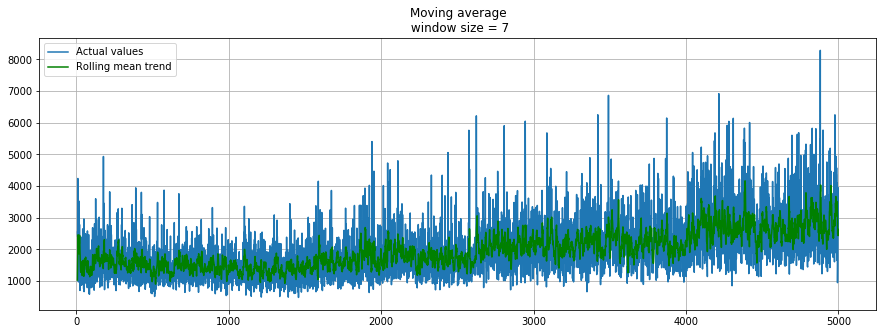

In [53]:
plotMovingAverage(df['likes'][:5000], 7)

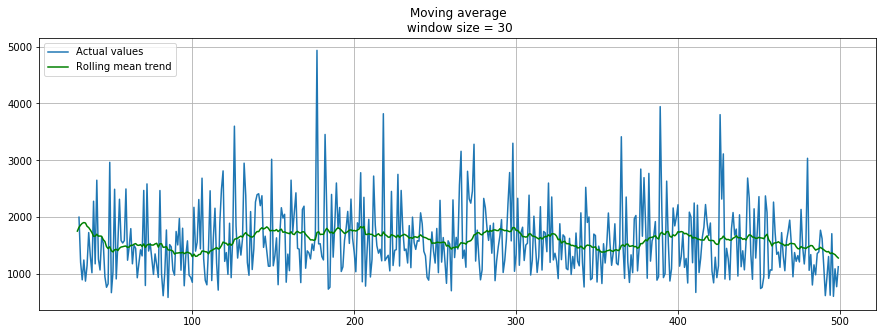

In [55]:
plotMovingAverage(df['likes'][:500], 30)

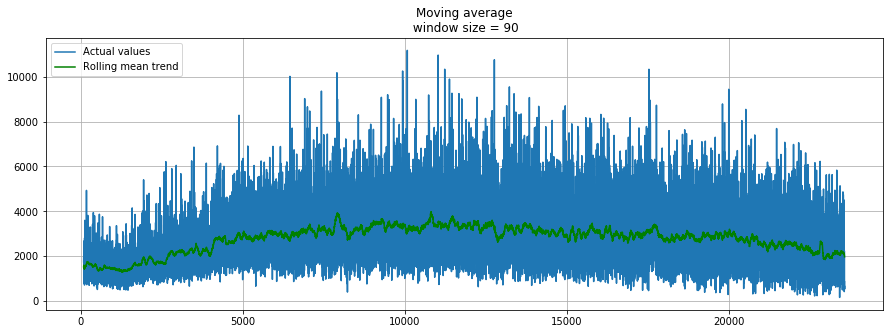

In [49]:
plotMovingAverage(df['likes'], 90)

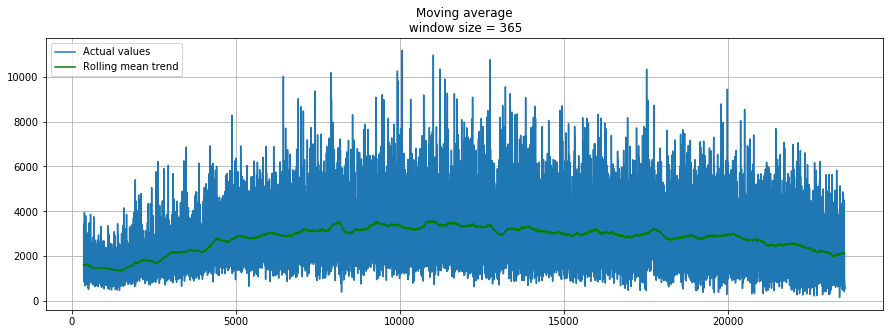

In [50]:
plotMovingAverage(df['likes'], 365)

In [ ]:
def weighted_average(series, weights):
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result += series[-n-1] * weights[n]
    return result